# Multilayer perceptrons in SKlearn and Pytorch

The aim of this notebook is to train a simple multilayer perceptron (or feed-forward) neural network using both the sklearn and pytorch libraries. In the **first** part of the notebook, we will provide some sparse template code to train the network. The overall structure should be familiar from last week's lab. If you are stuck, do look over last week's notebook, and refer to the sklearn documentation (as well as asking for demonstrator help). In the **second** part of the notebook, we will use pytorch to do the same thing.

We tackle the same problem twice to show how the same problem is treated using the two different libraries. The difference between the two libraries is that sklearn is a general-purpose machine learning library, whereas Pytorch is specfically for deep learning (i.e. neural networks). Sklearn is not intended to be a deep-learning library and does not support parallelisation via GPUs. This means it is fine for relatively small examples (<1000 rows, <50 features, 2-3 hidden layers), but becomes very slow for anything larger.

## SKlearn for MLPs
Last week, we imported data from the UCI repository. This week, we will start by using data that has been bundled with the sklearn library called 'digits'. The digits dataset is a simplified version of the very famous MNIST data set. This is a set of images, in black and white, of hand-drawn numbers from 0 to 9. Before proceeding, we will look at some of the data.

In [1]:
# import the digits dataset
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

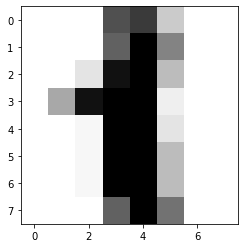

In [2]:
# get one image
image1 = digits.images[1]
plt.imshow(image1, cmap='Greys')

You should understand what the cmap parameter is doing here. If you do not, read the documentation for imshow (via a google search). The data in *images* is stored as a 2-d array, so that the rows and columns of the array match up with the physical coordinates of the image. The data in *data* is stored as a 1-d array, as shown below. You should compare both arrays to ensure you understand how the image data has been converted. From here, we will be working with *data*, as the sklearn functions take a 1-D array as input.

Note that this means, for the MLP we will be training, it does not matter which order the image pixels are, as long as they are consistent.

In [3]:
print(digits.images[1])
print(digits.data[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


Now let us train the MLP. As part of good practice, we scale the digits data. The effect of this is to ensure that any resulting gradients are of a similar scale. This will make the gradient descent process more likely to converge quickly.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X_scaled = preprocessing.scale(digits.data)

# split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size = 0.5)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
clf.score(X_test, y_test)

0.9488320355951056

We now repeat the process using cross validation, instead of a train/test split.

In [6]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.93333333 0.96111111 0.96111111 0.95530726 0.94413408]


## Questions
Using the code above as a template, experiment with changing some of the free parameters:

**Q1.** What do you expect to happen if you remove all hidden layers? Modify the neural network using *hidden_layer_sizes* = (). How do you expect this to compare to a logistic regression model? Write you answer below, and test your hypothesis by switching the neural network model for a logistic regression.

**Q1 Answer:**
Write answer here

**Q2.** Now modify the neural network to have one hidden layer with 20 nodes. How does the performance compare to the model with no hidden layers and two hidden layers?

**Q2 Answer:** Write answer here

**Q3 (Optional)** Investigate what happens as you increase the number of neurons in a one hidden layer network. Produce an appropriate plot to show the result (for instance, with neurons on the x axis and accuracy on the y axis)

# Pytorch for MLPs
We will now use the pytorch library to train the same type of neural network. We will start by using the digits dataset to replicate the SKlearn neural network exactly. We will then use a larger dataset of digits (MNIST). Before you undertake this section, you should have completed the *Introduction to Pytorch* notebook.

## Import libraries, including PyTorch
If you are using your own computer, you will need to install Pytorch. Setup guidance is here: https://pytorch.org/get-started/locally/)

In [7]:
# import pytorch library (load the neural network module as nn, for convenience to save us writing torch.nn every time
import torch
import torch.nn as nn

As we discovered in the previous notebook, pytorch uses tensors as its base unit. So, we will first convert the digits dataset into tensors.

In [13]:
X_scaled_t = torch.from_numpy(X_scaled)
#X_scaled_t = torch.transpose(X_scaled_t,0,1)
y_t = torch.from_numpy(digits.target)

In the previous notebook, we explicitly wrote a function called *model_prediction* that described a linear regression model. We apply the same process here, but the model is a little more complex, so we use some of the inbuilt functions within Pytorch. The following code sets up a 1 hidden layer neural network with 20 neurons.

(You may have noticed that we have set up a class, rather than a function (def) here. Broadly, a class is an object that can have many functions applied to it. The nature of an Object is beyond the scope of this course, and if you are interested you should investigate material on object oriented programming).

In [14]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.fc1 = torch.nn.Linear(input_size,20)
        self.fc2 = torch.nn.Linear(20,10)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        output = self.fc2(x)
    
        return output    # return output of network

Rather that explicitly writing out a loss function, we will use pytorch's inbuilt CrossEntropy loss.

In [15]:
loss_func = nn.CrossEntropyLoss()

We now create a training function - if you compare this to the previous notebook, you should see that it follows the same basic structure as the linear regression example.

The only exception is that we set the neural network into *train* mode using mlp.train. This is because some more advanced modifications to a neural network (e.g. batch normalisation) perform differently during training and running.

In [18]:
def train(num_epochs, network, X_train, y_train):
    
    # this sets the model mode - (i.e. layers like dropout, batchnorm etc behave differently during training compared to testing)
    # note that this function was not defined explicitly in CNN, but because CNN is a type of nn.Module, it inherits some functions
    # from the more general nn class.
    network.train()
    for epoch in range(num_epochs):   
        output = network(X_train) # this is the model prediction
        loss = loss_func(output, y_train) # evaluate the loss (error)
            
        # clear gradients for this training step   
        optimizer.zero_grad()           
            
        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                
            
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                    .format(epoch + 1, num_epochs, loss.item()))
        #    pass     
        pass
    pass

    # print the predicted (and true) labels after training. Note that raw output of the neural network is a score for each class, so we use argmax
    # to return the class with the highest score
    print(torch.argmax(output,1))
    print(y_train)

In [19]:
input_size = X_scaled_t.size(1) # input size is the same size as a digits image (8x8)
mlp = MLP(input_size) # set up an instance of the MLP object
mlp = mlp.double()

# use the adam optimiser to do the updates - this is a modern update to classic stochastic gradient descent
from torch import optim
optimizer = optim.Adam(mlp.parameters(), lr = 0.005)

# call the training function and run over 1000 epochs
num_epochs = 50
train(num_epochs, mlp, X_scaled_t, y_t.long())

Epoch [1/50], Loss: 2.3164
Epoch [2/50], Loss: 2.2854
Epoch [3/50], Loss: 2.2559
Epoch [4/50], Loss: 2.2276
Epoch [5/50], Loss: 2.2000
Epoch [6/50], Loss: 2.1730
Epoch [7/50], Loss: 2.1462
Epoch [8/50], Loss: 2.1196
Epoch [9/50], Loss: 2.0929
Epoch [10/50], Loss: 2.0662
Epoch [11/50], Loss: 2.0392
Epoch [12/50], Loss: 2.0119
Epoch [13/50], Loss: 1.9843
Epoch [14/50], Loss: 1.9565
Epoch [15/50], Loss: 1.9284
Epoch [16/50], Loss: 1.9001
Epoch [17/50], Loss: 1.8716
Epoch [18/50], Loss: 1.8430
Epoch [19/50], Loss: 1.8143
Epoch [20/50], Loss: 1.7855
Epoch [21/50], Loss: 1.7567
Epoch [22/50], Loss: 1.7279
Epoch [23/50], Loss: 1.6991
Epoch [24/50], Loss: 1.6703
Epoch [25/50], Loss: 1.6416
Epoch [26/50], Loss: 1.6130
Epoch [27/50], Loss: 1.5845
Epoch [28/50], Loss: 1.5560
Epoch [29/50], Loss: 1.5277
Epoch [30/50], Loss: 1.4996
Epoch [31/50], Loss: 1.4717
Epoch [32/50], Loss: 1.4439
Epoch [33/50], Loss: 1.4164
Epoch [34/50], Loss: 1.3891
Epoch [35/50], Loss: 1.3621
Epoch [36/50], Loss: 1.3354
E

## Questions
**Q1** Has the model finished training? (How can you tell whether it has or not?)

**Q2** Modify the *train* function above to dynamically set the number of training epochs, depending on the change in loss between iterations

**Q3** The size (number of neurons) of the hidden layer is 20. Try changing this - how does this affect the loss?

**Q4** Try adding an additional hidden layer of size 20 - you will need to make sure that the size of the inputs and outputs of each layer match up